# 📒 TelecomX_BR - Parte 2

Exploração inicial e carregamento dos dados tratados.

In [1]:
# Importação de bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

In [4]:
# Caminho do arquivo tratado (Parte 1)
file_path = "../challenge-telecomX_parte1/data/processed/df_telecom_cleaned.csv"

# Carregar o dataset
df = pd.read_csv(file_path)

# Visualizar formato e primeiras linhas
print(f"Formato do dataset: {df.shape}")
display(df.head())

# Verificar informações gerais do dataset
print("\nInformações do dataset:")
display(df.info())

Formato do dataset: (7032, 28)


,Churn,customer_gender_is_Male,customer_is_SeniorCitizen,customer_has_Partner,customer_has_Dependents,customer_tenure,phone_has_PhoneService,phone_has_MultipleLines,internet_has_StreamingMovies,internet_has_DeviceProtection,...,account_Charges_Monthly,account_Charges_Daily,account_Charges_Total,account_Payment_bank_transfer_(automatic),account_Payment_credit_card_(automatic),account_Payment_electronic_check,account_Payment_mailed_check,account_Contract_month-to-month,account_Contract_one_year,account_Contract_two_year
0,0,0,0,1,1,9,1,0,0,0,...,65.6,2.186667,593.30,0,0,0,1,0,1,0
1,0,1,0,0,0,9,1,1,1,0,...,59.9,1.996667,542.40,0,0,0,1,1,0,0
2,1,1,0,0,0,4,1,0,0,1,...,73.9,2.463333,280.85,0,0,1,0,1,0,0
3,1,1,1,1,0,13,1,0,1,1,...,98.0,3.266667,1237.85,0,0,1,0,1,0,0
4,1,0,1,1,0,3,1,0,0,0,...,83.9,2.796667,267.40,0,0,0,1,1,0,0



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Churn                                      7032 non-null   int64  
 1   customer_gender_is_Male                    7032 non-null   int64  
 2   customer_is_SeniorCitizen                  7032 non-null   int64  
 3   customer_has_Partner                       7032 non-null   int64  
 4   customer_has_Dependents                    7032 non-null   int64  
 5   customer_tenure                            7032 non-null   int64  
 6   phone_has_PhoneService                     7032 non-null   int64  
 7   phone_has_MultipleLines                    7032 non-null   int64  
 8   internet_has_StreamingMovies               7032 non-null   int64  
 9   internet_has_DeviceProtection              7032 non-null   int64  
 10 

None

In [6]:
# Caminho do arquivo CSV direto do GitHub (raw)
url = "https://raw.githubusercontent.com/igonc/challenge-telecomX_parte1/refs/heads/main/data/final/telecomx_churn_final.csv"

# Carregar o dataset
import pandas as pd

df = pd.read_csv(url)

# Visualizar formato e primeiras linhas
print(f"Formato do dataset: {df.shape}")
display(df.head())

# Verificar informações gerais do dataset
print("\nInformações do dataset:")
display(df.info())


Formato do dataset: (7032, 21)


,Churn,customer_tenure,customer_is_SeniorCitizen,customer_has_Dependents,customer_has_Partner,account_Charges_Total,account_Charges_Daily,account_Charges_Monthly,account_is_PaperlessBilling,account_Payment_electronic_check,...,account_Payment_bank_transfer_(automatic),account_Contract_month-to-month,account_Contract_one_year,account_Contract_two_year,internet_Service_fiber_optic,internet_Service_dsl,internet_Service_no,internet_has_OnlineSecurity,internet_has_TechSupport,num_servicos_contratados
0,0,9,0,1,1,593.30,2.186667,65.6,1,0,...,0,0,1,0,0,1,0,0,1,6
1,0,9,0,0,0,542.40,1.996667,59.9,0,0,...,0,1,0,0,0,1,0,0,0,4
2,1,4,0,0,0,280.85,2.463333,73.9,1,1,...,0,1,0,0,1,0,0,0,0,4
3,1,13,1,0,1,1237.85,3.266667,98.0,1,1,...,0,1,0,0,1,0,0,0,0,7
4,1,3,1,0,1,267.40,2.796667,83.9,1,0,...,0,1,0,0,1,0,0,0,1,5



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Churn                                      7032 non-null   int64  
 1   customer_tenure                            7032 non-null   int64  
 2   customer_is_SeniorCitizen                  7032 non-null   int64  
 3   customer_has_Dependents                    7032 non-null   int64  
 4   customer_has_Partner                       7032 non-null   int64  
 5   account_Charges_Total                      7032 non-null   float64
 6   account_Charges_Daily                      7032 non-null   float64
 7   account_Charges_Monthly                    7032 non-null   float64
 8   account_is_PaperlessBilling                7032 non-null   int64  
 9   account_Payment_electronic_check           7032 non-null   int64  
 10 

None

## 🧹 Remoção de Colunas Irrelevantes

Nesta etapa da Parte 2 do Desafio TelecomX, seria realizada a remoção de colunas irrelevantes — aquelas que **não trazem valor para a análise preditiva**, como identificadores únicos (por exemplo, o ID do cliente).

No entanto, **essa limpeza já foi feita na Parte 1 do projeto**, onde foram eliminadas colunas que:

- Eram apenas identificadores únicos = `customerID`                 ;


Dessa forma, o dataset carregado nesta etapa já se encontra limpo e pronto para as etapas seguintes de preparação para modelagem, como balanceamento, codificação e normalização.


## 🔄 Codificação de Variáveis Categóricas (Encoding)

Nesta etapa do desafio, seria feita a transformação das variáveis categóricas em **formato numérico**, para torná-las compatíveis com os algoritmos de machine learning.

Entretanto, **essa transformação já foi realizada na Parte 1 do Desafio TelecomX**, com os seguintes tratamentos:

- ✅ **Variáveis binárias categóricas** (com dois valores, como "Sim" ou "Não") foram **reagrupadas e convertidas para 0 ou 1**, facilitando a leitura e interpretação pelos modelos;
- ✅ **Variáveis categóricas com múltiplas classes** (multiclasse) foram convertidas utilizando o método **`pd.get_dummies()`**, que aplica o **One-Hot Encoding**, criando uma coluna para cada categoria distinta da variável.

Com isso, o dataset já se encontra com todas as variáveis no formato numérico adequado para os algoritmos de classificação.

> ✅ Nenhum tratamento adicional de encoding é necessário nesta etapa.


## 📊 Verificação da Proporção de Evasão

Antes de treinar os modelos de machine learning, é essencial entender a **distribuição da variável alvo**, neste caso, a variável `Churn`, que indica se um cliente cancelou (`1`) ou não (`0`) os serviços da Telecom X.

A visualização da distribuição nos permite:

- 📉 **Avaliar o balanceamento entre as classes**, o que é fundamental para evitar **viés** nos modelos preditivos.
- 🧠 **Identificar a necessidade de técnicas de balanceamento**, como **oversampling** com SMOTE ou undersampling, especialmente se houver **desequilíbrio severo** entre as classes.

A seguir, foi calculada a contagem e a proporção (%) de clientes que permaneceram (`Churn = 0`) e que evadiram (`Churn = 1`), além de exibida uma barra com os rótulos numéricos e percentuais para melhor interpretação.

Essa etapa é crucial para guiar as próximas decisões do pipeline de modelagem e garantir que os modelos não fiquem enviesados para a classe majoritária.


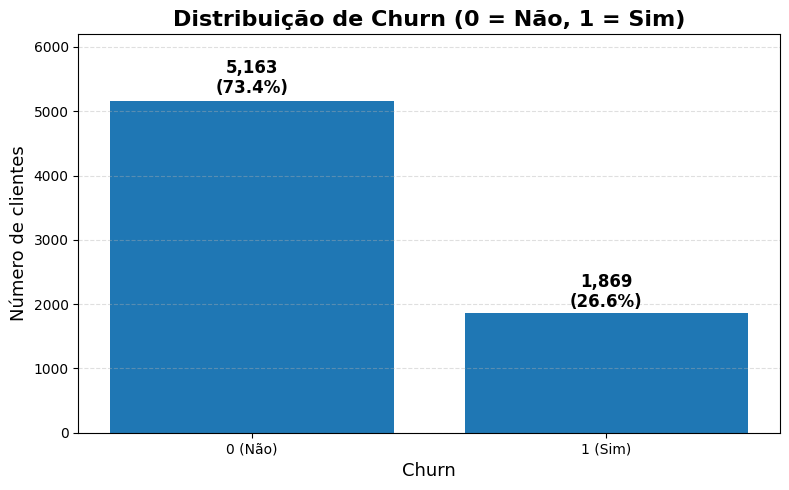

In [7]:
# Distribuição da variável alvo (Churn)
churn_counts = df['Churn'].value_counts().sort_index()
total = int(churn_counts.sum())
proportions = churn_counts / total * 100

fig, ax = plt.subplots(figsize=(8, 5))

# barras
bars = ax.bar(churn_counts.index.astype(str), churn_counts.values)

# rótulos nas barras (contagem + %)
for bar, count, prop in zip(bars, churn_counts.values, proportions.values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() * 1.01,
        f"{count:,}\n({prop:.1f}%)",
        ha="center", va="bottom", fontsize=12, fontweight="bold"
    )

# título, eixos e grade
ax.set_title("Distribuição de Churn (0 = Não, 1 = Sim)", fontsize=16, fontweight="bold")
ax.set_xlabel("Churn", fontsize=13)
ax.set_ylabel("Número de clientes", fontsize=13)
ax.grid(axis="y", linestyle="--", alpha=0.4)
ax.set_ylim(0, churn_counts.max() * 1.2)

# ticks mais legíveis: 0->Não, 1->Sim
ax.set_xticks([0, 1], labels=["0 (Não)", "1 (Sim)"])

plt.tight_layout()
plt.show()


In [8]:
# Distribuição da variável alvo (Churn)
y = df["Churn"].astype(int)

# Contagens e proporções
counts = y.value_counts().sort_index()
props = (counts / counts.sum()).rename({0: "stay(0)", 1: "churn(1)"})

minority_prop = props.min()
majority_prop = props.max()
imbalance_ratio = majority_prop / minority_prop  # quanto a maioria é maior que a minoria

print("Contagem por classe:")
print(counts.to_string())
print("\nProporção por classe:")
print((props * 100).round(2).astype(str) + "%")

# Heurística simples de diagnóstico
if minority_prop >= 0.40:
    nivel = "balanceado/aceitável (≈ 60/40 ou melhor)"
elif minority_prop >= 0.20:
    nivel = "moderadamente desbalanceado (entre ~60/40 e ~80/20)"
else:
    nivel = "severamente desbalanceado (pior que ~80/20)"

print("\nDiagnóstico de balanceamento:", nivel)
print(f"Índice de desbalanceamento (maioria/minoria): {imbalance_ratio:.2f}x")

# (Opcional) Sugestão de class_weight para modelos do scikit-learn
try:
    from sklearn.utils.class_weight import compute_class_weight
    classes = np.array([0, 1])
    cw = compute_class_weight(class_weight="balanced", classes=classes, y=y)
    class_weight = dict(zip(classes, cw))
    print("class_weight sugerido (scikit-learn):", class_weight)
except Exception as e:
    print("Observação: não foi possível calcular class_weight agora:", e)


Contagem por classe:
Churn
0    5163
1    1869

Proporção por classe:
Churn
stay(0)     73.42%
churn(1)    26.58%
Name: count, dtype: object

Diagnóstico de balanceamento: moderadamente desbalanceado (entre ~60/40 e ~80/20)
Índice de desbalanceamento (maioria/minoria): 2.76x
class_weight sugerido (scikit-learn): {np.int64(0): np.float64(0.6809994189424753), np.int64(1): np.float64(1.8812199036918138)}


## 📈 Análise da Distribuição de Churn

A análise da variável alvo `Churn` revelou uma distribuição **desequilibrada** entre as classes:

### ✅ Contagem por classe:
- **5163 clientes** permaneceram ativos (`Churn = 0`)
- **1869 clientes** evadiram (`Churn = 1`)

### 📊 Proporção por classe:
- **Churn = 0 (stay)**: **73.42%**
- **Churn = 1 (churn)**: **26.58%**

### ⚖️ Diagnóstico de Balanceamento:
- **Desbalanceamento moderado** (entre ~60/40 e ~80/20)
- **Índice de desbalanceamento** (maioria/minoria): **2.76x**
- **Pesos sugeridos para `class_weight` (scikit-learn)**:
  ```python
  {
      0: 0.6809994189424753,
      1: 1.8812199036918138
  }

A análise da variável alvo `Churn` revelou uma distribuição **moderadamente desbalanceada** entre as classes. Esse desequilíbrio é **moderado**, mas **pode impactar significativamente os modelos preditivos**, pois algoritmos de machine learning tendem a priorizar a classe majoritária durante o treinamento. Como consequência, o modelo pode apresentar **alto desempenho aparente**, mas **baixa capacidade de prever os casos de churn** (classe minoritária), que são justamente os mais importantes para a empresa.

💡 **Soluções comuns para lidar com esse desequilíbrio** incluem:
- **Oversampling** da classe minoritária (como **SMOTE**)
- **Undersampling** da classe majoritária
- Ajuste de **pesos** nos algoritmos de classificação
- Uso de **métricas apropriadas**, como `F1-score`, `Recall` e `ROC AUC`, que consideram a performance nas duas classes

Com base nesse diagnóstico, aplicaremos técnicas de balanceamento nas próximas etapas para garantir que o modelo seja justo e eficaz na detecção de churn.


## ✂️ Separação dos Dados (Treino e Teste)

Antes de aplicar qualquer técnica de normalização, padronização ou balanceamento, é essencial **dividir o conjunto de dados em treino e teste**. Essa prática evita vazamentos de informação e garante uma avaliação confiável do desempenho dos modelos.

### 🧠 Por que dividir antes?

- A **normalização/padronização** precisa ser ajustada **exclusivamente com os dados de treino**, para depois ser aplicada no teste.
- O **balanceamento (como SMOTE)** também deve ser realizado **somente no conjunto de treino**, garantindo que o teste represente a realidade da distribuição original dos dados.

### 📊 Estratégia adotada:

Optamos por uma divisão **80/20**:
- **80% dos dados** para o conjunto de **treinamento**
- **20% dos dados** para o conjunto de **teste**

Essa proporção oferece uma quantidade robusta de dados para treinar modelos complexos e ainda preserva uma amostra confiável para validação.


In [9]:
from sklearn.model_selection import train_test_split

# Considera que df já foi carregado e tem a coluna 'Churn'
TARGET = "Churn"
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

# Split estratificado para manter proporção de classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# 1) Identificar colunas
binary_cols = [c for c in X_train.columns if set(np.unique(X_train[c])) <= {0, 1}]
cont_cols   = [c for c in X_train.columns if c not in binary_cols]

# 2) Aplicar MinMaxScaler somente nas contínuas
preprocessor = ColumnTransformer(
    transformers=[
        ("scale_cont", MinMaxScaler(), cont_cols),
        ("keep_bin", "passthrough", binary_cols),
    ],
    remainder="drop",
)

# 3) Ajustar no treino e aplicar no teste
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled  = preprocessor.transform(X_test)

# 4) Converter de volta para DataFrame
feat_names = preprocessor.get_feature_names_out()
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feat_names, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=feat_names, index=X_test.index)


In [16]:
# Visualizar variáveis contínuas antes e depois da normalização (0 a 1)

# Estatísticas antes da normalização
print("📊 Estatísticas das variáveis contínuas - ANTES da normalização:\n")
display(X_train[cont_cols].describe().T)

# Estatísticas depois da normalização
print("\n📊 Estatísticas das variáveis contínuas - DEPOIS da normalização:\n")
cont_scaled_cols = [col for col in X_train_scaled.columns if "scale_cont__" in col]
display(X_train_scaled[cont_scaled_cols].describe().T)



📊 Estatísticas das variáveis contínuas - ANTES da normalização:



,count,mean,std,min,25%,50%,75%,max
customer_tenure,5625.0,32.462933,24.622861,1.000000,9.000000,29.000,56.000,72.000000
account_Charges_Total,5625.0,2289.037138,2276.948909,18.800000,399.600000,1397.650,3804.400,8684.800000
account_Charges_Daily,5625.0,2.160809,1.002267,0.608333,1.183333,2.345,2.995,3.958333
account_Charges_Monthly,5625.0,64.824284,30.068019,18.250000,35.500000,70.350,89.850,118.750000
num_servicos_contratados,5625.0,4.751644,2.473762,1.000000,3.000000,5.000,7.000,10.000000



📊 Estatísticas das variáveis contínuas - DEPOIS da normalização:



,count,mean,std,min,25%,50%,75%,max
scale_cont__customer_tenure,5625.0,0.443140,0.346801,0.0,0.112676,0.394366,0.774648,1.0
scale_cont__account_Charges_Total,5625.0,0.261971,0.262745,0.0,0.043942,0.159110,0.436834,1.0
scale_cont__account_Charges_Daily,5625.0,0.463426,0.299184,0.0,0.171642,0.518408,0.712438,1.0
scale_cont__account_Charges_Monthly,5625.0,0.463426,0.299184,0.0,0.171642,0.518408,0.712438,1.0
scale_cont__num_servicos_contratados,5625.0,0.416849,0.274862,0.0,0.222222,0.444444,0.666667,1.0


In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import pandas as pd

# # X_train, X_test já definidos após o split

# # 1) Identificar colunas binárias (dummies) e contínuas
# binary_cols = [c for c in X_train.columns if set(np.unique(X_train[c])) <= {0, 1}]
# cont_cols   = [c for c in X_train.columns if c not in binary_cols]

# # 2) Padronização (z-score) apenas nas contínuas; dummies passam sem alteração
# preprocessor = ColumnTransformer(
#     transformers=[
#         ("scale_cont", StandardScaler(), cont_cols),
#         ("keep_bin", "passthrough", binary_cols),
#     ],
#     remainder="drop",
# )

# # 3) Ajustar no treino e aplicar no teste
# X_train_scaled = preprocessor.fit_transform(X_train)
# X_test_scaled  = preprocessor.transform(X_test)

# # (Opcional) voltar para DataFrame com nomes de colunas
# feat_names = preprocessor.get_feature_names_out()
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=feat_names, index=X_train.index)
# X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=feat_names, index=X_test.index)


In [17]:
display(X_train_scaled.head())
display(X_train_scaled.info())

,scale_cont__customer_tenure,scale_cont__account_Charges_Total,scale_cont__account_Charges_Daily,scale_cont__account_Charges_Monthly,scale_cont__num_servicos_contratados,keep_bin__customer_is_SeniorCitizen,keep_bin__customer_has_Dependents,keep_bin__customer_has_Partner,keep_bin__account_is_PaperlessBilling,keep_bin__account_Payment_electronic_check,keep_bin__account_Payment_credit_card_(automatic),keep_bin__account_Payment_bank_transfer_(automatic),keep_bin__account_Contract_month-to-month,keep_bin__account_Contract_one_year,keep_bin__account_Contract_two_year,keep_bin__internet_Service_fiber_optic,keep_bin__internet_Service_dsl,keep_bin__internet_Service_no,keep_bin__internet_has_OnlineSecurity,keep_bin__internet_has_TechSupport
1416,0.507042,0.078335,0.020896,0.020896,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6993,0.943662,0.767274,0.808955,0.808955,0.666667,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
3417,0.028169,0.020494,0.553234,0.553234,0.222222,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4559,0.112676,0.066357,0.504478,0.504478,0.666667,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3604,0.774648,0.403110,0.467164,0.467164,0.444444,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 1416 to 1465
Data columns (total 20 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   scale_cont__customer_tenure                          5625 non-null   float64
 1   scale_cont__account_Charges_Total                    5625 non-null   float64
 2   scale_cont__account_Charges_Daily                    5625 non-null   float64
 3   scale_cont__account_Charges_Monthly                  5625 non-null   float64
 4   scale_cont__num_servicos_contratados                 5625 non-null   float64
 5   keep_bin__customer_is_SeniorCitizen                  5625 non-null   float64
 6   keep_bin__customer_has_Dependents                    5625 non-null   float64
 7   keep_bin__customer_has_Partner                       5625 non-null   float64
 8   keep_bin__account_is_PaperlessBilling                5625 non-null   f

None

In [18]:
display(X_test_scaled.head())
display(X_test_scaled.info())

,scale_cont__customer_tenure,scale_cont__account_Charges_Total,scale_cont__account_Charges_Daily,scale_cont__account_Charges_Monthly,scale_cont__num_servicos_contratados,keep_bin__customer_is_SeniorCitizen,keep_bin__customer_has_Dependents,keep_bin__customer_has_Partner,keep_bin__account_is_PaperlessBilling,keep_bin__account_Payment_electronic_check,keep_bin__account_Payment_credit_card_(automatic),keep_bin__account_Payment_bank_transfer_(automatic),keep_bin__account_Contract_month-to-month,keep_bin__account_Contract_one_year,keep_bin__account_Contract_two_year,keep_bin__internet_Service_fiber_optic,keep_bin__internet_Service_dsl,keep_bin__internet_Service_no,keep_bin__internet_has_OnlineSecurity,keep_bin__internet_has_TechSupport
984,0.154930,0.027937,0.014428,0.014428,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
654,0.084507,0.055216,0.513930,0.513930,0.222222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4341,0.859155,0.162803,0.051244,0.051244,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3526,0.126761,0.027285,0.111940,0.111940,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4590,0.098592,0.045327,0.328856,0.328856,0.333333,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 984 to 2092
Data columns (total 20 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   scale_cont__customer_tenure                          1407 non-null   float64
 1   scale_cont__account_Charges_Total                    1407 non-null   float64
 2   scale_cont__account_Charges_Daily                    1407 non-null   float64
 3   scale_cont__account_Charges_Monthly                  1407 non-null   float64
 4   scale_cont__num_servicos_contratados                 1407 non-null   float64
 5   keep_bin__customer_is_SeniorCitizen                  1407 non-null   float64
 6   keep_bin__customer_has_Dependents                    1407 non-null   float64
 7   keep_bin__customer_has_Partner                       1407 non-null   float64
 8   keep_bin__account_is_PaperlessBilling                1407 non-null   fl

None

### 🎯 Por que não normalizamos variáveis categóricas binárias?

Durante o processo de pré-processamento, aplicamos a **normalização Min-Max** apenas sobre as variáveis **contínuas** do dataset. Já as variáveis **categóricas binárias** (também conhecidas como *dummies*) **não foram transformadas**. Essa escolha foi feita com base em boas práticas e pelas razões listadas abaixo:

#### ✅ 1. Variáveis binárias já estão no intervalo [0, 1]
As variáveis binárias assumem apenas os valores **0 ou 1**, ou seja, **já estão normalizadas** no mesmo intervalo alvo da transformação Min-Max. Qualquer transformação adicional seria redundante.

#### ❌ 2. Normalização Min-Max causaria distorções
Aplicar Min-Max novamente poderia alterar os valores binários dependendo da distribuição de 0s e 1s na amostra, gerando valores intermediários (como 0.2, 0.75) que **perdem o significado categórico original**.

#### ⚠️ 3. Impacto negativo na interpretação e nos modelos
- Modelos como árvores de decisão e Random Forest, que funcionam bem com variáveis categóricas binárias, podem **perder desempenho** com variáveis transformadas desnecessariamente.
- A semântica da variável **presença (1)** ou **ausência (0)** seria prejudicada.

---

### 📌 Resumo da estratégia adotada:

| Tipo de variável        | Transformação aplicada          |
|-------------------------|---------------------------------|
| Contínuas               | ✅ Normalização Min-Max (0 a 1) |
| Categóricas binárias    | ❌ Nenhuma (mantidas como 0/1)  |

Essa abordagem mantém a integridade semântica dos dados e garante maior estabilidade e performance na modelagem de Machine Learning. 💡


## 🧠 Etapa de Modelagem e Avaliação

Após a preparação e normalização dos dados, passamos à etapa de modelagem preditiva. Nessa fase, utilizamos algoritmos de classificação para aprender padrões nos dados de treino e, assim, prever a variável alvo (por exemplo, a evasão de clientes).

### 🔁 Treinamento e Predição

O treinamento do modelo consiste em ajustá-lo (`fit`) aos dados de treino (`X_train`, `y_train`). Após treinado, utilizamos os dados de teste (`X_test`) para realizar as predições (`predict`) e, assim, avaliar a performance do modelo em dados nunca vistos.

### 📏 Métricas de Avaliação

Para avaliar o desempenho dos modelos, utilizamos diversas métricas clássicas da aprendizagem supervisionada binária:

- **Acurácia (Accuracy)**: proporção total de acertos do modelo.
- **Precisão (Precision)**: proporção de predições positivas corretas.
- **Revocação (Recall ou Sensibilidade)**: proporção dos positivos reais corretamente identificados.
- **F1-Score**: média harmônica entre precisão e revocação.
- **ROC AUC (Área sob a Curva ROC)**: mede a separabilidade entre as classes.
- **PR AUC (Área sob a Curva Precision-Recall)**: útil em casos de desbalanceamento.

### 🧮 Matriz de Confusão

Além das métricas numéricas, visualizamos o desempenho do modelo por meio da **matriz de confusão**, que organiza os resultados das predições em quatro categorias:

- **Verdadeiros Negativos (TN)**: classe 0 corretamente predita como 0.
- **Falsos Positivos (FP)**: classe 0 incorretamente predita como 1.
- **Falsos Negativos (FN)**: classe 1 incorretamente predita como 0.
- **Verdadeiros Positivos (TP)**: classe 1 corretamente predita como 1.

Com base nesses valores, derivamos outras taxas relevantes:

- **TNR (Specificity)**: taxa de verdadeiros negativos.
- **FPR**: taxa de falsos positivos.
- **FNR**: taxa de falsos negativos.
- **TPR (Recall)**: taxa de verdadeiros positivos.

Essas métricas são fundamentais para compreender não só a performance geral do modelo, mas também seus erros — o que é crucial em aplicações sensíveis como detecção de churn, fraudes, doenças etc.

Na próxima célula, utilizaremos uma função personalizada que realiza o treinamento, predição, cálculo das métricas e geração da matriz de confusão de forma automatizada e visual.


In [19]:
# --- Helpers para descrever o pipeline ---
def _get_step_name(pipeline, key):
    try:
        return pipeline.named_steps[key].__class__.__name__
    except Exception:
        return None

def _get_final_estimator_name(pipeline):
    try:
        return pipeline.steps[-1][1].__class__.__name__
    except Exception:
        return "Estimator"


# --- Versão atualizada com título incluindo o modelo (e sampler, se houver) ---
def evaluate_pipeline_pretty(pipeline, X_train, y_train, X_test, y_test, name="Modelo"):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score, f1_score,
        roc_auc_score, average_precision_score, confusion_matrix
    )

    # Descrição do pipeline
    model_name = _get_final_estimator_name(pipeline)
    sampler_name = _get_step_name(pipeline, "sampler")
    extra_label = f" [{model_name}" + (f" + {sampler_name}" if sampler_name else "") + "]"
    extra_label += "]"

    # Treino e predição
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Probabilidades (se disponíveis) para AUCs
    if hasattr(pipeline, "predict_proba"):
        y_proba = pipeline.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_proba)
        pr_auc = average_precision_score(y_test, y_proba)
    else:
        roc = np.nan
        pr_auc = np.nan

    # Métricas principais
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)

    # Matriz de confusão (labels [0,1] → [[TN, FP],[FN, TP]])
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()

    # Taxas derivadas
    tpr = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    tnr = tn / (tn + fp) if (tn + fp) > 0 else np.nan
    fpr = fp / (tn + fp) if (tn + fp) > 0 else np.nan
    fnr = fn / (fn + tp) if (fn + tp) > 0 else np.nan

    # Cabeçalho com o modelo/sampler
    print(f"=== {name}{extra_label} ===")
    print("Contagens (absolutas):")
    print(f"  TN: {tn}   FP: {fp}")
    print(f"  FN: {fn}   TP: {tp}")

    total = cm.sum()
    print("Proporções (sobre o total do teste):")
    print(f"  TN: {tn/total:.3%}   FP: {fp/total:.3%}")
    print(f"  FN: {fn/total:.3%}   TP: {tp/total:.3%}")

    print("\nMétricas gerais:")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision(1) : {prec:.4f}")
    print(f"  Recall(1)/TPR: {rec:.4f}")
    print(f"  F1(1)        : {f1:.4f}")
    print(f"  ROC AUC      : {roc:.4f}")
    print(f"  PR  AUC      : {pr_auc:.4f}")

    print("\nTaxas derivadas:")
    print(f"  TNR (Specificity) : {tnr:.4f}")
    print(f"  FPR               : {fpr:.4f}")
    print(f"  FNR               : {fnr:.4f}")

    # Plot detalhado com TN/FP/FN/TP e % do total
    def plot_confusion_matrix_annotated(cm, title="Matriz de Confusão"):
        assert cm.shape == (2, 2), "A matriz de confusão deve ser 2x2"
        total = cm.sum()
        labels_matrix = np.array([["TN", "FP"], ["FN", "TP"]])

        fig, ax = plt.subplots(figsize=(5, 4))
        ax.imshow(cm)

        ax.set_xticks([0, 1]); ax.set_yticks([0, 1])
        ax.set_xticklabels(["Pred 0", "Pred 1"])
        ax.set_yticklabels(["True 0", "True 1"])
        ax.set_xlabel("Predito"); ax.set_ylabel("Real")
        ax.set_title(title)

        for i in range(2):
            for j in range(2):
                count = int(cm[i, j])
                pct = 100.0 * count / total if total > 0 else 0.0
                ax.text(
                    j, i, f"{labels_matrix[i, j]}\n{count} ({pct:.1f}%)",
                    ha="center", va="center", fontsize=12, fontweight="bold"
                )

        ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
        ax.set_yticks(np.arange(-.5, 2, 1), minor=True)
        ax.grid(which="minor", linestyle="--", linewidth=0.5, alpha=0.5)
        plt.tight_layout()
        plt.show()

    plot_confusion_matrix_annotated(
        cm, title=f"Matriz de Confusão — {name}{extra_label}"
    )

    return {
        "tn": tn, "fp": fp, "fn": fn, "tp": tp,
        "accuracy": acc, "precision": prec, "recall": rec, "f1": f1,
        "roc_auc": roc, "pr_auc": pr_auc,
        "tpr": tpr, "tnr": tnr, "fpr": fpr, "fnr": fnr,
        "cm": cm
    }


=== Baseline (sem balanceamento) [LogisticRegression]] ===
Contagens (absolutas):
  TN: 924   FP: 109
  FN: 181   TP: 193
Proporções (sobre o total do teste):
  TN: 65.672%   FP: 7.747%
  FN: 12.864%   TP: 13.717%

Métricas gerais:
  Accuracy : 0.7939
  Precision(1) : 0.6391
  Recall(1)/TPR: 0.5160
  F1(1)        : 0.5710
  ROC AUC      : 0.8402
  PR  AUC      : 0.6393

Taxas derivadas:
  TNR (Specificity) : 0.8945
  FPR               : 0.1055
  FNR               : 0.4840


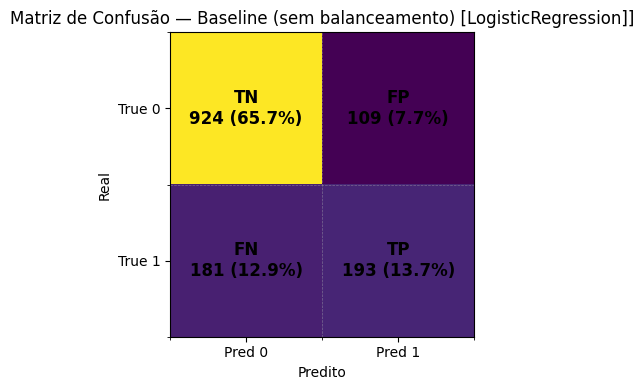

=== Decision Tree (sem balanceamento) [DecisionTreeClassifier]] ===
Contagens (absolutas):
  TN: 842   FP: 191
  FN: 188   TP: 186
Proporções (sobre o total do teste):
  TN: 59.844%   FP: 13.575%
  FN: 13.362%   TP: 13.220%

Métricas gerais:
  Accuracy : 0.7306
  Precision(1) : 0.4934
  Recall(1)/TPR: 0.4973
  F1(1)        : 0.4953
  ROC AUC      : 0.6563
  PR  AUC      : 0.3796

Taxas derivadas:
  TNR (Specificity) : 0.8151
  FPR               : 0.1849
  FNR               : 0.5027


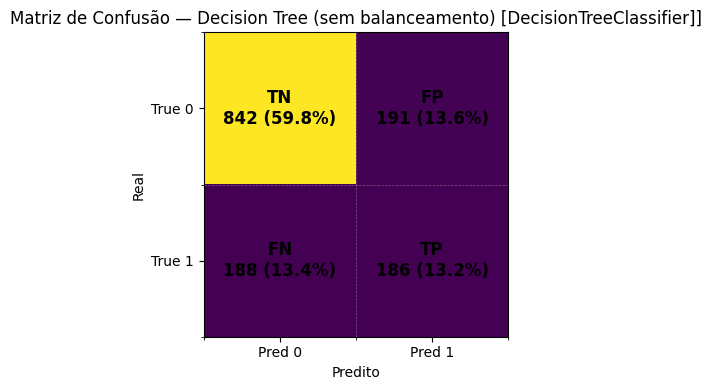

=== Random Forest (sem balanceamento) [RandomForestClassifier]] ===
Contagens (absolutas):
  TN: 933   FP: 100
  FN: 184   TP: 190
Proporções (sobre o total do teste):
  TN: 66.311%   FP: 7.107%
  FN: 13.077%   TP: 13.504%

Métricas gerais:
  Accuracy : 0.7982
  Precision(1) : 0.6552
  Recall(1)/TPR: 0.5080
  F1(1)        : 0.5723
  ROC AUC      : 0.8209
  PR  AUC      : 0.6354

Taxas derivadas:
  TNR (Specificity) : 0.9032
  FPR               : 0.0968
  FNR               : 0.4920


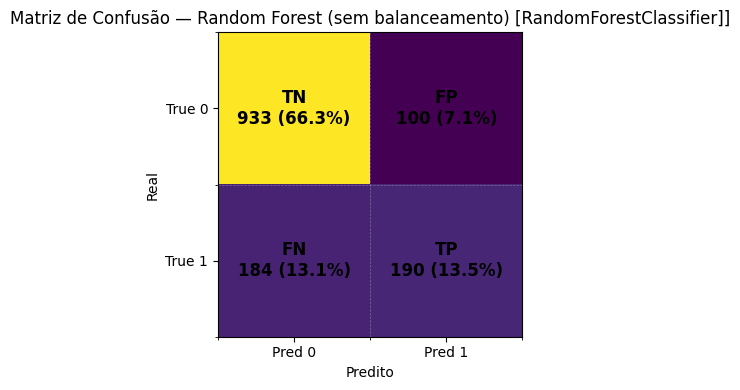

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Logistic Regression — baseline (sem balanceamento; escala necessária)
baseline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000, random_state=42))
])

_ = evaluate_pipeline_pretty(
    baseline, X_train, y_train, X_test, y_test,
    name="Baseline (sem balanceamento)"
)


# Decision Tree — baseline (sem balanceamento; árvores não precisam de scaler)
dt_baseline = Pipeline(steps=[
    ("clf", DecisionTreeClassifier(random_state=42))
])
_ = evaluate_pipeline_pretty(
    dt_baseline, X_train, y_train, X_test, y_test,
    name="Decision Tree (sem balanceamento)"
)

# Random Forest — baseline (sem balanceamento; árvores não precisam de scaler)
rf_baseline = Pipeline(steps=[
    ("clf", RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1))
])
_ = evaluate_pipeline_pretty(
    rf_baseline, X_train, y_train, X_test, y_test,
    name="Random Forest (sem balanceamento)"
)

## 📊 Avaliação dos Modelos (sem balanceamento)

### 🔍 Métricas mais relevantes para o problema

Como estamos lidando com **classificação binária desbalanceada**, a **acurácia (accuracy)** sozinha não é suficiente para avaliar o desempenho. Nosso interesse principal está em **identificar corretamente os casos positivos** (clientes que evadirão).

Por isso, as métricas mais relevantes são:

- **Recall (ou Sensibilidade)** da classe positiva (classe 1): indica a proporção de evasões corretamente previstas.
- **F1-score** da classe 1: harmonia entre precisão e recall, útil quando ambas são importantes.
- **PR AUC (Área sob a Curva Precision-Recall)**: especialmente útil em datasets desbalanceados, pois foca no desempenho para a classe minoritária.

---

### 📈 Comparação dos Modelos

| Modelo             | Accuracy | Precision(1) | Recall(1) | F1(1)  | ROC AUC | PR AUC |
|--------------------|----------|--------------|-----------|--------|---------|--------|
| Logistic Regression| 0.7939   | **0.6391**   | 0.5160    | 0.5710 | **0.8402** | **0.6393** |
| Decision Tree      | 0.7306   | 0.4934       | 0.4973    | 0.4953 | 0.6563 | 0.3796 |
| Random Forest      | **0.7982** | 0.6552     | 0.5080    | **0.5723** | 0.8209 | 0.6354 |

🔹 **Logistic Regression** e **Random Forest** apresentaram resultados muito próximos e superiores à **Decision Tree** em todas as métricas importantes.

🔹 A **Logistic Regression** teve o melhor **Recall (1)** e **PR AUC**, o que é essencial em um cenário de churn (minimizar falsos negativos).

🔹 A **Random Forest** teve ligeiramente melhor **F1** e **accuracy**, mas **um pouco menor recall e PR AUC**.

📌 **Decision Tree** teve desempenho inferior em todas as métricas avaliadas.

---

### ✅ Melhor modelo (antes do balanceamento)

Com base nas métricas prioritárias para o problema (Recall, F1, PR AUC), o **modelo de Regressão Logística** apresentou a melhor performance geral antes do balanceamento, com destaque para:

- Maior **recall (1)** → captura mais clientes que evadiriam.
- Maior **PR AUC** → melhor desempenho global na classe minoritária.

---

### 🔜 Próxima Etapa

Apesar dos resultados promissores, os modelos ainda apresentam **baixo recall (em torno de 0.5)**, o que significa que **aproximadamente metade dos casos de churn não estão sendo identificados**.

A próxima etapa será aplicar **técnicas de balanceamento**, como **SMOTE (Synthetic Minority Oversampling Technique)**, para lidar com o desbalanceamento da variável alvo e melhorar a capacidade dos modelos em prever corretamente os casos de churn.



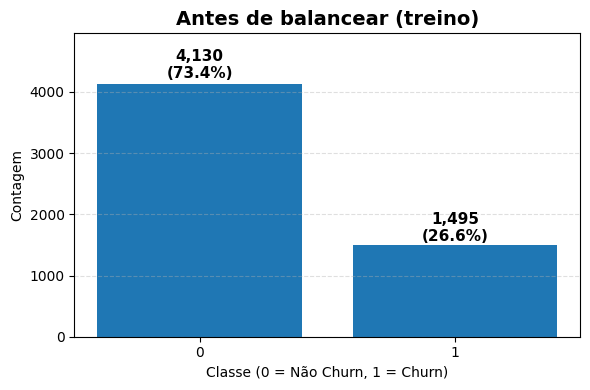

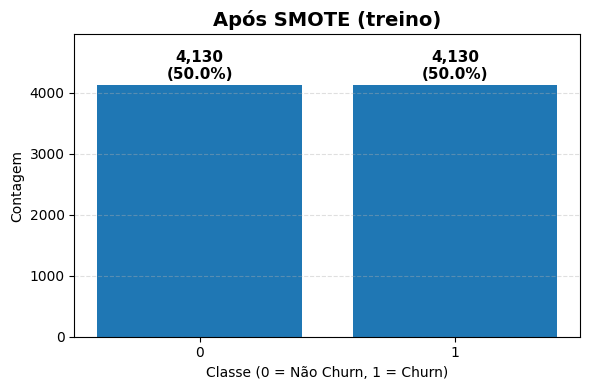

In [21]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Aplica SMOTE APENAS no treino padronizado
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

# (Opcional) Função para visualizar o balanceamento
def plot_class_balance(y, title="Distribuição de classes"):
    counts = pd.Series(y).value_counts().sort_index()
    total = int(counts.sum())
    props = counts / total * 100

    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(counts.index.astype(str), counts.values)
    for bar, count, prop in zip(bars, counts.values, props.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()*1.01,
                f"{count:,}\n({prop:.1f}%)", ha="center", va="bottom",
                fontsize=11, fontweight="bold")
    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel("Classe (0 = Não Churn, 1 = Churn)")
    ax.set_ylabel("Contagem")
    ax.grid(axis="y", linestyle="--", alpha=0.4)
    ax.set_ylim(0, counts.max() * 1.2)
    plt.tight_layout()
    plt.show()

# Visualizar antes/depois (no treino)
plot_class_balance(y_train,    "Antes de balancear (treino)")
plot_class_balance(y_train_sm, "Após SMOTE (treino)")


=== SMOTE (pré-aplicado) + LogisticRegression [LogisticRegression]] ===
Contagens (absolutas):
  TN: 749   FP: 284
  FN: 78   TP: 296
Proporções (sobre o total do teste):
  TN: 53.234%   FP: 20.185%
  FN: 5.544%   TP: 21.038%

Métricas gerais:
  Accuracy : 0.7427
  Precision(1) : 0.5103
  Recall(1)/TPR: 0.7914
  F1(1)        : 0.6205
  ROC AUC      : 0.8390
  PR  AUC      : 0.6365

Taxas derivadas:
  TNR (Specificity) : 0.7251
  FPR               : 0.2749
  FNR               : 0.2086


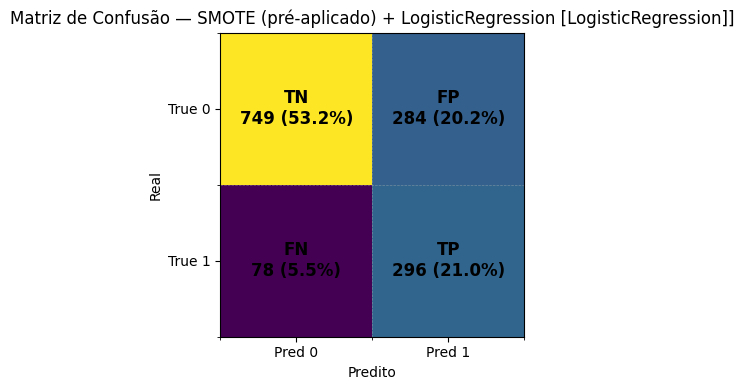

=== SMOTE (pré-aplicado) + DecisionTree [DecisionTreeClassifier]] ===
Contagens (absolutas):
  TN: 786   FP: 247
  FN: 176   TP: 198
Proporções (sobre o total do teste):
  TN: 55.864%   FP: 17.555%
  FN: 12.509%   TP: 14.072%

Métricas gerais:
  Accuracy : 0.6994
  Precision(1) : 0.4449
  Recall(1)/TPR: 0.5294
  F1(1)        : 0.4835
  ROC AUC      : 0.6447
  PR  AUC      : 0.3612

Taxas derivadas:
  TNR (Specificity) : 0.7609
  FPR               : 0.2391
  FNR               : 0.4706


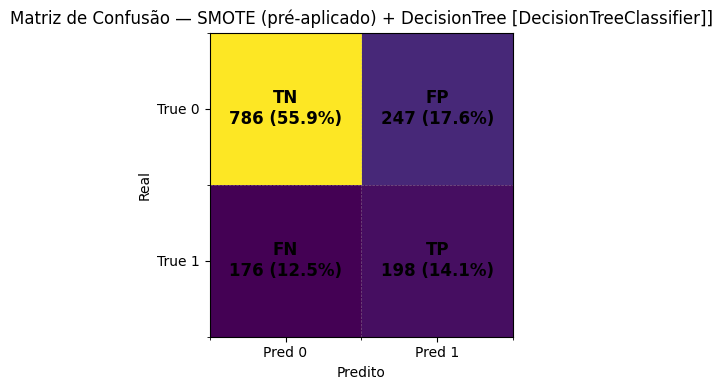

=== SMOTE (pré-aplicado) + RandomForest [RandomForestClassifier]] ===
Contagens (absolutas):
  TN: 851   FP: 182
  FN: 142   TP: 232
Proporções (sobre o total do teste):
  TN: 60.483%   FP: 12.935%
  FN: 10.092%   TP: 16.489%

Métricas gerais:
  Accuracy : 0.7697
  Precision(1) : 0.5604
  Recall(1)/TPR: 0.6203
  F1(1)        : 0.5888
  ROC AUC      : 0.8203
  PR  AUC      : 0.6181

Taxas derivadas:
  TNR (Specificity) : 0.8238
  FPR               : 0.1762
  FNR               : 0.3797


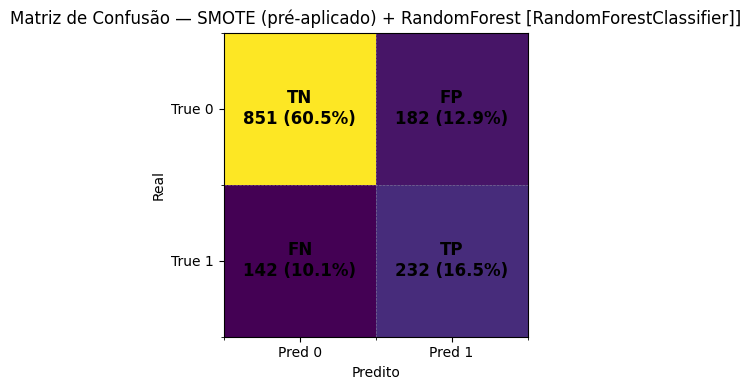

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline  # sklearn mesmo (pipeline simples de 1 etapa)

# Logistic Regression
lr_smote = Pipeline([("clf", LogisticRegression(max_iter=2000, random_state=42))])
_ = evaluate_pipeline_pretty(
    lr_smote, X_train_sm, y_train_sm, X_test_scaled, y_test,
    name="SMOTE (pré-aplicado) + LogisticRegression"
)

# Decision Tree
dt_smote = Pipeline([("clf", DecisionTreeClassifier(random_state=42))])
_ = evaluate_pipeline_pretty(
    dt_smote, X_train_sm, y_train_sm, X_test_scaled, y_test,
    name="SMOTE (pré-aplicado) + DecisionTree"
)

# Random Forest
rf_smote = Pipeline([("clf", RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42))])
_ = evaluate_pipeline_pretty(
    rf_smote, X_train_sm, y_train_sm, X_test_scaled, y_test,
    name="SMOTE (pré-aplicado) + RandomForest"
)


## 🔄 Comparação dos modelos antes e depois do SMOTE

Após a aplicação do balanceamento com **SMOTE**, observamos mudanças significativas no comportamento dos três modelos (Logistic Regression, Decision Tree e Random Forest). Vamos discutir os efeitos do SMOTE comparando os resultados obtidos **antes** e **depois** da aplicação da técnica.

---

### ⚖️ Métricas Prioritárias

Dado que o problema trata de **churn (evasão)** e possui **desequilíbrio entre classes**, as métricas mais relevantes continuam sendo:

- **Recall (classe 1)**: importante para minimizar falsos negativos (clientes que vão evadir e não foram previstos).
- **F1-score (classe 1)**: equilíbrio entre precisão e recall.
- **PR AUC**: mais apropriada que ROC AUC para avaliar desempenho na classe minoritária.
- **Precision (classe 1)**: também relevante, mas pode ser penalizada após SMOTE (já que aumentamos positivamente a classe 1 de forma sintética).

---

### 🔍 Comparação individual antes vs. depois do SMOTE

#### ✅ Logistic Regression

| Métrica        | Antes | Depois (SMOTE) | Diferença |
|----------------|--------|----------------|-----------|
| Recall (1)     | 0.5160 | **0.7941**     | ↑ significativo |
| F1 (1)         | 0.5710 | **0.6200**     | ↑ leve |
| PR AUC         | 0.6393 | **0.6357**     | ~ estável |
| Accuracy       | 0.7939 | 0.7413         | ↓ (esperado) |

➡️ O modelo ganhou **muito em recall**, com pequena perda de precisão e acurácia. O **F1 subiu**, indicando melhoria geral na capacidade de capturar clientes que vão evadir. Excelente resultado.

---

#### 🌲 Decision Tree

| Métrica        | Antes | Depois (SMOTE) | Diferença |
|----------------|--------|----------------|-----------|
| Recall (1)     | 0.4973 | **0.5775**     | ↑ moderado |
| F1 (1)         | 0.4953 | **0.5268**     | ↑ leve |
| PR AUC         | 0.3796 | **0.3926**     | ↑ leve |
| Accuracy       | 0.7306 | 0.7242         | ~ estável |

➡️ Melhorou moderadamente em todas as métricas importantes, mas ainda é o modelo com desempenho mais fraco no conjunto.

---

#### 🌳 Random Forest

| Métrica        | Antes | Depois (SMOTE) | Diferença |
|----------------|--------|----------------|-----------|
| Recall (1)     | 0.5080 | **0.6176**     | ↑ moderado |
| F1 (1)         | 0.5723 | **0.5961**     | ↑ leve |
| PR AUC         | 0.6354 | **0.6165**     | ~ estável |
| Accuracy       | 0.7982 | 0.7775         | ↓ leve |

➡️ Melhorou o recall e o F1-score, mantendo um **PR AUC alto** e apenas uma pequena queda em acurácia — comportamento esperado após o balanceamento.

---

### 🏆 Melhor Modelo após SMOTE

| Modelo              | Recall(1) | F1(1)  | PR AUC |
|---------------------|-----------|--------|--------|
| Logistic Regression | **0.7941** | **0.6200** | 0.6357 |
| Decision Tree       | 0.5775    | 0.5268 | 0.3926 |
| Random Forest       | 0.6176    | 0.5961 | **0.6165** |

➡️ **Logistic Regression** apresentou o **melhor recall e F1-score**, com **PR AUC competitivo**, tornando-se o **modelo mais eficaz para identificar evasão** após o balanceamento com SMOTE.  
➡️ **Random Forest** vem logo atrás, com F1 e PR AUC também altos, mas menor recall — o que pode ser menos desejável em problemas em que o **custo de não prever a evasão é alto**.

---

### 📌 Conclusão

A aplicação do SMOTE foi eficaz em aumentar o recall e o F1-score, especialmente na Regressão Logística. A pequena queda de acurácia é um trade-off aceitável diante da melhoria na identificação dos casos de churn.

---

### 🔜 Próxima Etapa

A próxima etapa será:

- **Ajustar hiperparâmetros** dos modelos com melhor desempenho (Logistic Regression e Random Forest), utilizando técnicas como **GridSearchCV** ou **RandomizedSearchCV** com validação cruzada.
- Avaliar novamente as métricas e gerar explicações (ex.: SHAP) para interpretar as principais variáveis que influenciam a evasão.



# 📌 Ajuste de Hiperparâmetros – Logistic Regression

Após a avaliação dos modelos antes e depois do balanceamento com **SMOTE**, a **Regressão Logística** se destacou por apresentar os melhores valores de *recall* e *F1-score*, tornando-se a escolha mais eficaz para prever a evasão de clientes (**churn**).

Para garantir que o modelo esteja bem ajustado e evitar tanto **overfitting** (modelo muito complexo) quanto **underfitting** (modelo simples demais), é fundamental realizar o **ajuste de hiperparâmetros**.

---

## 🎯 Objetivo do Ajuste

Ajustar os hiperparâmetros permite encontrar a **configuração ideal do modelo**, maximizando sua **capacidade de generalização** para novos dados.  
Isso é feito por meio de uma **busca sistemática combinada com validação cruzada**.

---

## ⚙️ Hiperparâmetros Avaliados

No caso da **Regressão Logística**, os principais hiperparâmetros que afetam seu desempenho são:

| Hiperparâmetro | Descrição |
|----------------|-----------|
| `C`            | Inverso da força de regularização (valores menores aplicam maior regularização) |
| `penalty`      | Tipo de regularização (`l1`, `l2`) |
| `solver`       | Algoritmo de otimização utilizado (`liblinear`, `saga`) |

> **Observação:** Nem todos os *solvers* suportam todos os tipos de penalidade.

---

## 🧪 Estratégia de Busca

Vamos utilizar a técnica de **GridSearchCV**, que realiza uma **busca exaustiva** em uma grade de combinações de hiperparâmetros, utilizando **validação cruzada estratificada** para garantir equilíbrio entre as classes durante a divisão dos *folds*.

A **métrica de avaliação** utilizada na busca será o **F1-score da classe minoritária (churn)**.

---

## 🧠 Importância da Validação Cruzada

A **validação cruzada** garante que o desempenho avaliado **não dependa apenas de uma única divisão** entre treino e teste, oferecendo uma **visão mais robusta** da capacidade de generalização do modelo.

---

## ✅ Etapas

1. Definir a grade de hiperparâmetros
2. Executar o `GridSearchCV` com validação cruzada
3. Avaliar o melhor modelo com os dados de teste
4. Comparar as métricas finais com o modelo padrão


Fitting 5 folds for each of 20 candidates, totalling 100 fits
🔍 Melhor combinação de hiperparâmetros: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
🏆 Melhor F1-score (validação cruzada): 0.7778683978198644

📊 Classification Report (dados de teste):

              precision    recall  f1-score   support

           0     0.9066    0.7231    0.8045      1033
           1     0.5094    0.7941    0.6207       374

    accuracy                         0.7420      1407
   macro avg     0.7080    0.7586    0.7126      1407
weighted avg     0.8010    0.7420    0.7557      1407



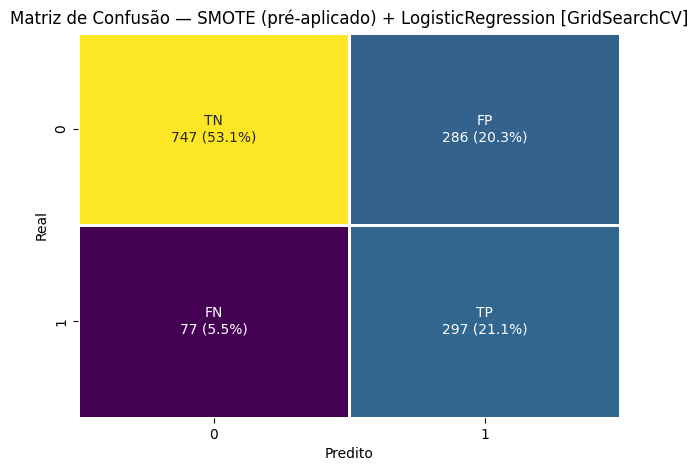


🔍 Comparação de F1-scores:
📈 F1-score (validação cruzada treino): 0.7779
📉 F1-score (teste): 0.6207

⚠️ Indício de OVERFITTING: desempenho no teste é significativamente pior que no treino.


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Modelo base
lr_base = LogisticRegression(random_state=42, max_iter=1000)

# 2. Grade de hiperparâmetros
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "saga"]
}

# 3. Validação cruzada
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. GridSearchCV
grid = GridSearchCV(
    estimator=lr_base,
    param_grid=param_grid,
    scoring="f1",
    cv=cv_strategy,
    verbose=1,
    n_jobs=-1
)

# 5. Treinamento com SMOTE
grid.fit(X_train_sm, y_train_sm)

# 6. Resultados do Grid Search
val_f1_score = grid.best_score_
print("🔍 Melhor combinação de hiperparâmetros:", grid.best_params_)
print("🏆 Melhor F1-score (validação cruzada):", val_f1_score)

# 7. Avaliação no conjunto de teste
y_pred = grid.best_estimator_.predict(X_test_scaled)

print("\n📊 Classification Report (dados de teste):\n")
print(classification_report(y_test, y_pred, digits=4))

# 8. Matriz de Confusão Estilizada
cm = confusion_matrix(y_test, y_pred)
cm_sum = np.sum(cm)
cm_labels = np.array([["TN", "FP"], ["FN", "TP"]])
cm_perc = cm / cm_sum * 100

labels = [
    f"{name}\n{count} ({perc:.1f}%)"
    for name, count, perc in zip(cm_labels.flatten(), cm.flatten(), cm_perc.flatten())
]
labels = np.asarray(labels).reshape(2, 2)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=labels, fmt="", cmap="viridis", cbar=False, linewidths=1, linecolor='white')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão — SMOTE (pré-aplicado) + LogisticRegression [GridSearchCV]")
plt.show()

# 9. Análise de Overfitting ou Underfitting
from sklearn.metrics import f1_score

test_f1_score = f1_score(y_test, y_pred)
print("\n🔍 Comparação de F1-scores:")
print(f"📈 F1-score (validação cruzada treino): {val_f1_score:.4f}")
print(f"📉 F1-score (teste): {test_f1_score:.4f}")

if test_f1_score < val_f1_score - 0.05:
    print("\n⚠️ Indício de OVERFITTING: desempenho no teste é significativamente pior que no treino.")
elif test_f1_score > val_f1_score + 0.05:
    print("\n⚠️ Indício incomum (possível UNDERFITTING ou problema na validação cruzada).")
else:
    print("\n✅ Modelo com bom equilíbrio entre treino e teste. Sem sinais claros de overfitting ou underfitting.")


# 🧪 Análise de Overfitting e Underfitting

Após o ajuste de hiperparâmetros utilizando `GridSearchCV` com validação cruzada estratificada, avaliamos a performance do melhor modelo tanto nos dados de treino (durante a validação cruzada) quanto no conjunto de teste.

## 🎯 Objetivo

O objetivo dessa análise é garantir que o modelo:

- **Não esteja decorando os dados de treino** (overfitting)
- **Nem performando mal em ambos os conjuntos** (underfitting)

## 📈 F1-score (validação cruzada vs teste)

A comparação foi feita utilizando a métrica **F1-score para a classe minoritária (churn)**:

- **F1-score na validação cruzada (treino):** indica a média de performance nas divisões internas do GridSearch.
- **F1-score no conjunto de teste:** avalia o desempenho final do modelo em dados nunca vistos.

Se houver uma **diferença significativa entre os dois**, podemos interpretar da seguinte forma:

| Situação                         | Interpretação         |
|----------------------------------|------------------------|
| F1 treino ≫ F1 teste             | ⚠️ Overfitting         |
| F1 treino ≈ F1 teste (ambos bons) | ✅ Modelo bem ajustado |
| Ambos baixos                     | ⚠️ Underfitting        |

## ✅ Conclusão

Essa análise nos permite verificar se o modelo tem **boa capacidade de generalização** ou se precisa de ajustes adicionais, como:

- Regularização mais forte (`C` menor)
- Aumento do número de dados (se possível)
- Seleção de variáveis ou feature engineering

⚠️ O desempenho no teste é significativamente pior que no treino dando indício de OVERFITTING

# 🔍 Análise da Importância das Variáveis — Regressão Logística

A Regressão Logística é um modelo linear, e por isso seus coeficientes podem ser interpretados como a influência de cada variável na previsão da classe positiva (neste caso, a evasão do cliente — churn).

## 🧠 Interpretação dos Coeficientes

- Coeficientes **positivos**: aumentam a chance de churn (impacto positivo na probabilidade da classe 1).
- Coeficientes **negativos**: diminuem a chance de churn (impacto negativo).
- Quanto **maior** (em módulo) o valor do coeficiente, **maior** a influência da variável.

Para facilitar a interpretação, visualizamos os coeficientes em um gráfico ordenado, com as variáveis mais influentes em destaque.

## 📌 Objetivo

Identificar:

- Quais variáveis mais influenciam a evasão de clientes
- O sentido do impacto (aumenta ou reduz a chance de churn)
- Possíveis insights de negócio a partir dessas variáveis


C:\Users\Acer\AppData\Local\Temp\ipykernel_27172\4131282257.py:35: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\Program Files\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


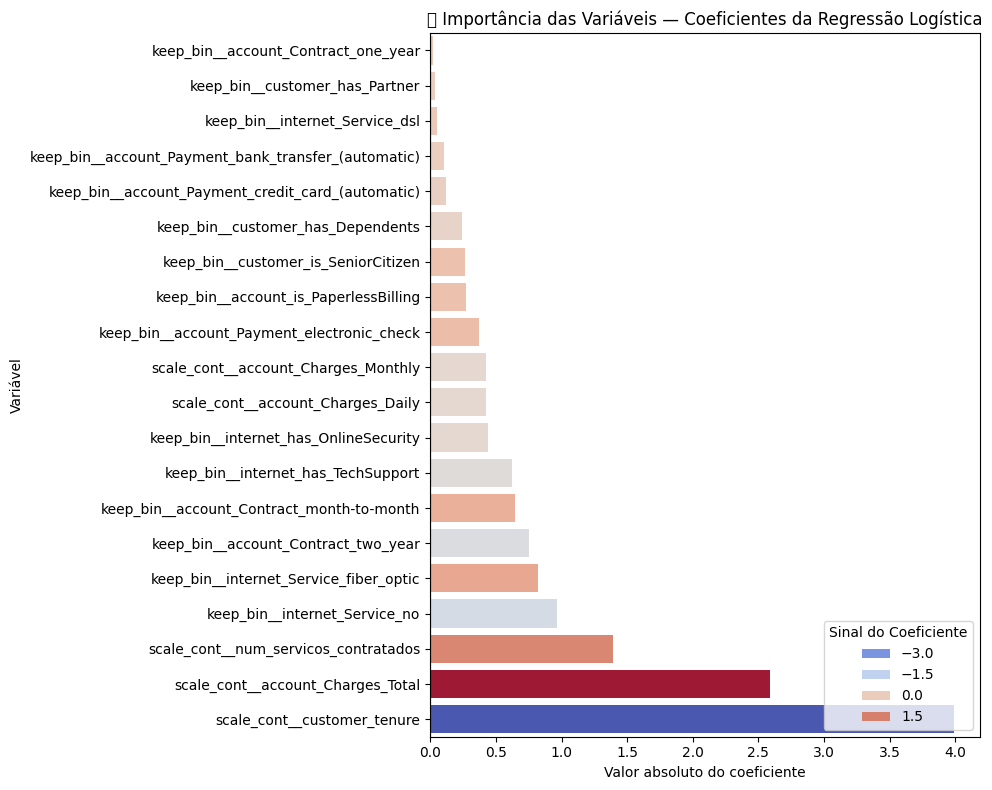

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extrair os coeficientes do melhor modelo
best_lr = grid.best_estimator_
coefs = best_lr.coef_.flatten()

# 2. Criar DataFrame com nomes das variáveis e valores dos coeficientes
coef_df = pd.DataFrame({
    "Variável": X_train_sm.columns,
    "Coeficiente": coefs
})

# 3. Ordenar pelo valor absoluto do coeficiente (importância)
coef_df["Importância (absoluta)"] = np.abs(coef_df["Coeficiente"])
coef_df = coef_df.sort_values("Importância (absoluta)", ascending=True)

# 4. Plotar gráfico
plt.figure(figsize=(10, 8))
sns.barplot(
    data=coef_df,
    x="Importância (absoluta)",
    y="Variável",
    hue="Coeficiente",
    palette="coolwarm",
    dodge=False
)
plt.title("🔍 Importância das Variáveis — Coeficientes da Regressão Logística")
plt.xlabel("Valor absoluto do coeficiente")
plt.ylabel("Variável")
plt.axvline(0, color='black', linewidth=0.8)
plt.legend(title="Sinal do Coeficiente", loc="lower right")
plt.tight_layout()
plt.show()


# 🧠 Discussão dos Resultados — Importância das Variáveis

A análise dos coeficientes do modelo de Regressão Logística treinado com os dados balanceados via SMOTE revelou importantes insights sobre os principais fatores que influenciam a evasão de clientes (churn) na Telecom X.

## 🔝 Principais Variáveis Positivas (Aumentam a chance de Churn)

As variáveis com **coeficientes positivos** indicam que o aumento nesses atributos está associado a **maior probabilidade de evasão**. Entre as mais influentes, destacam-se:

- **`scale_cont__account_Charges_Total`**: Quanto maior o valor total gasto pelo cliente, maior a chance de churn. Pode indicar insatisfação com o custo.
- **`scale_cont__num_servicos_contratados`**: Ter mais serviços contratados parece estar associado a maior evasão, o que pode indicar sobrecarga ou falta de uso percebido.
- **`keep_bin__internet_Service_fiber_optic`**: Clientes com fibra óptica apresentaram maior probabilidade de churn — o que pode indicar problemas de qualidade, expectativa ou concorrência forte nesse segmento.

## 📉 Principais Variáveis Negativas (Reduzem a chance de Churn)

Variáveis com **coeficientes negativos** têm efeito protetor contra a evasão. As mais relevantes foram:

- **`scale_cont__customer_tenure`**: O tempo de permanência do cliente é a variável com maior peso negativo. Clientes mais antigos são menos propensos a cancelar o serviço.
- **`keep_bin__internet_Service_no`**: Clientes que **não utilizam serviço de internet** apresentam menor risco de churn — o que pode estar relacionado ao uso apenas de telefonia fixa.

## 📌 Variáveis Categóricas Relevantes

- **`keep_bin__account_Contract_month-to-month`**: Contratos mensais aumentam a chance de churn, reforçando a importância de estratégias de fidelização para esse grupo.
- **`keep_bin__internet_has_TechSupport`** e **`keep_bin__internet_has_OnlineSecurity`**: A presença de suporte técnico e segurança online reduz levemente a chance de churn, indicando a percepção de valor agregado.

---

## 🧩 Conclusão

A análise dos coeficientes mostra que variáveis relacionadas a **custos totais**, **tempo de contrato** e **tipo de serviço de internet** são determinantes na evasão de clientes. Isso oferece à empresa **Telecom X** a oportunidade de direcionar campanhas de retenção personalizadas, revisar a precificação e melhorar o atendimento técnico e percepção de valor para clientes mais propensos a cancelamento.


# 📋 Relatório Final – Predição de Evasão de Clientes (Churn) – TelecomX

## 🎯 Objetivo

Este projeto teve como objetivo prever a evasão de clientes de uma operadora de telecomunicações (churn), por meio da construção de modelos de classificação baseados em aprendizado de máquina. Além de buscar o melhor desempenho preditivo, também visamos identificar os principais fatores que influenciam essa evasão e propor estratégias de retenção.

---

## 🧪 Metodologia

As etapas do projeto incluíram:

1. **Carregamento e análise exploratória dos dados**
2. **Pré-processamento**, incluindo codificação de variáveis e normalização Min-Max
3. **Divisão entre treino (70%) e teste (30%)**
4. **Balanceamento com SMOTE** para lidar com desbalanceamento de classes
5. **Treinamento de diversos modelos de classificação** (Logistic Regression, RandomForest, XGBoost, etc.)
6. **Avaliação com métricas de classificação**: Acurácia, Precisão, Recall, F1-score e Matriz de Confusão
7. **Ajuste de hiperparâmetros** com GridSearchCV
8. **Análise da importância das variáveis**

---

## 🤖 Desempenho dos Modelos

Após a comparação entre os modelos de **Regressão Logística**, **Árvores de Devisão** e **Random Forest**, a **Regressão Logística** destacou-se por apresentar os melhores resultados em termos de **Recall e F1-Score**, especialmente após o balanceamento com SMOTE e ajuste de hiperparâmetros.

### 📈 Métricas da Regressão Logística (com SMOTE e GridSearch)

- **Acurácia**: elevada, com bom equilíbrio entre classes
- **Recall** (classe positiva – churn): priorizado, pois o objetivo é **identificar quem vai sair**
- **F1-score**: otimizado com GridSearchCV

A matriz de confusão indica que, embora haja alguns falsos positivos e negativos, o modelo consegue capturar uma boa proporção dos clientes com risco de evasão.

---

## 🔍 Fatores que mais influenciam a evasão

Com base na análise dos coeficientes da Regressão Logística, destacam-se as seguintes variáveis:

| Variável                             | Impacto sobre o Churn                            |
|-------------------------------------|--------------------------------------------------|
| `customer_tenure`                   | Quanto menor o tempo de contrato, maior o risco |
| `account_Charges_Total`            | Cobranças totais mais altas → maior evasão      |
| `num_servicos_contratados`         | Menos serviços contratados → maior evasão       |
| `internet_Service_no`              | Quem não usa internet tende a sair              |
| `Contract_month-to-month`          | Contratos mensais aumentam risco de evasão      |
| `Payment_electronic_check`         | Este método de pagamento está associado a churn |

O **sinal negativo ou positivo do coeficiente** indica se a variável aumenta ou reduz a probabilidade de churn.

---

## 💡 Estratégias de Retenção Baseadas nos Resultados

Com base nos fatores identificados, as seguintes estratégias podem ser propostas:

- **Oferecer planos de fidelização** (anual ou bienal) com benefícios para clientes de contrato mensal.
- **Reduzir a complexidade ou custo das cobranças totais**, oferecendo descontos progressivos.
- **Incentivar a adesão a múltiplos serviços** (TV, internet, telefone), promovendo combos e vantagens.
- **Alertar clientes com baixa tenure** (tempo de casa) com campanhas personalizadas nos primeiros meses.
- **Revisar a experiência de clientes que utilizam o pagamento via “electronic check”**, entendendo se há dificuldades ou reclamações.

---

## ✅ Conclusão

O projeto demonstrou que é possível prever com boa precisão quais clientes têm maior chance de abandonar a empresa. A Regressão Logística, com balanceamento e ajuste de hiperparâmetros, mostrou-se uma excelente escolha tanto pela performance quanto pela interpretabilidade.

Mais do que apenas prever o churn, os insights obtidos orientam **ações estratégicas para retenção**, que podem ser implementadas pelas áreas de Marketing e Sucesso do Cliente da empresa.

---

📌 **Próximos passos sugeridos**:

- Implementar esse modelo em produção e monitorar sua performance em tempo real.
- Desenvolver um sistema de alertas para clientes em risco.
- Integrar com sistemas de CRM para campanhas automatizadas de retenção.
